In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [2]:
# Read data from CSV files
mapper_GB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-GB_letterFrequencyCombiner_results.csv')
InMapping_GB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-GB_letterFrequencyInMapping_results.csv')

mapper_MB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-MB_letterFrequencyCombiner_results.csv')
InMapping_MB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-MB_letterFrequencyInMapping_results.csv')

mapper_KB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-KB_letterFrequencyCombiner_results.csv')
InMapping_KB_data = pd.read_csv('/home/hadoop/letter-frequency-hadoop-MapReduce/resources/performance/performance_csv/performance-KB_letterFrequencyInMapping_results.csv')


# Add a column to indicate the phase (mapper or reducer) 
mapper_GB_data['Phase'] = 'Mapper'
InMapping_GB_data['Phase'] = 'InMapping'

mapper_MB_data['Phase'] = 'Mapper'
InMapping_MB_data['Phase'] = 'InMapping'

mapper_KB_data['Phase'] = 'Mapper'
InMapping_KB_data['Phase'] = 'InMapping'


# Merge the dataframes for each file size
combined_GB_data = pd.concat([mapper_GB_data, InMapping_GB_data])

combined_MB_data = pd.concat([mapper_MB_data, InMapping_MB_data])

combined_KB_data = pd.concat([mapper_KB_data, InMapping_KB_data])

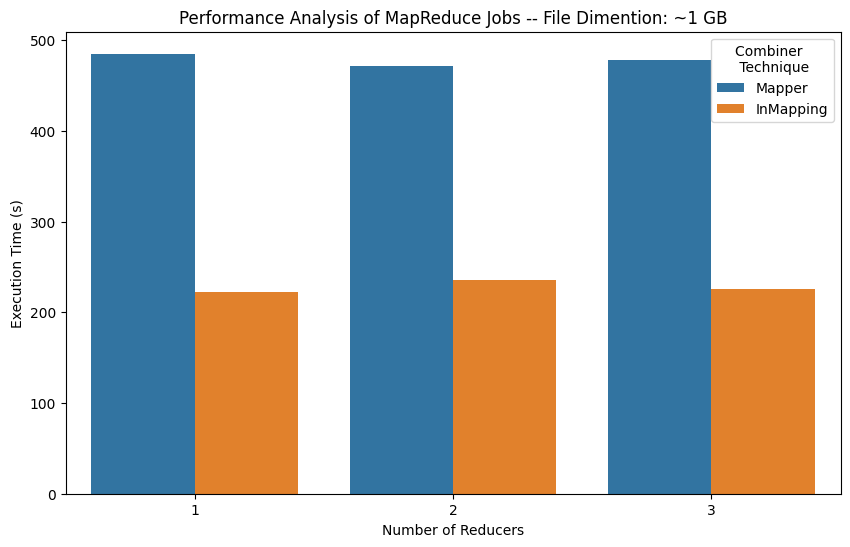

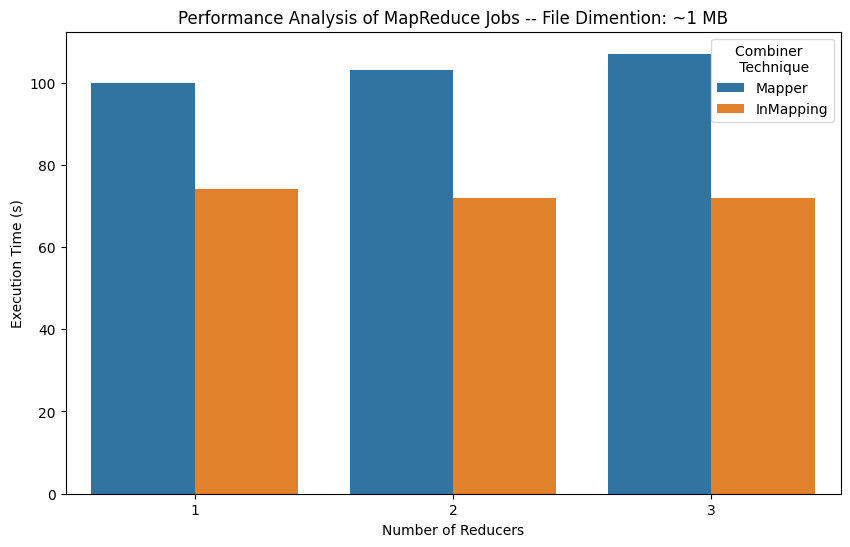

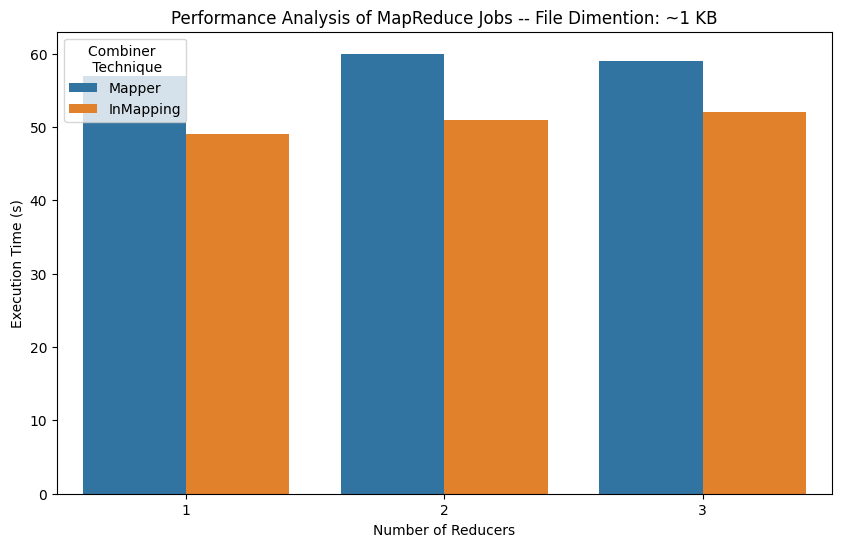

In [3]:
df_collection = [combined_GB_data, combined_MB_data, combined_KB_data]

# Plot the data in three different plots
i = 0
for df in df_collection:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='NumReducers', y='ExecutionTime', data=df, hue='Phase')
    if i == 0:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: ~1 GB')
    elif i == 1:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: ~1 MB')
    else:
        plt.title('Performance Analysis of MapReduce Jobs -- File Dimention: ~1 KB')
    plt.ylabel('Execution Time (s)')
    plt.xlabel('Number of Reducers')
    plt.legend(title='Combiner \n Technique')
    i += 1
    plt.show()

In [4]:
# CPU Times data

CPU_Times_Mapper_1_reducer_GB = 1.313,85
CPU_Times_Mapper_2_reducer_GB = 1.405,77
CPU_Times_Mapper_3_reducer_GB = 1.394,86

CPU_Times_InMapping_1_reducer_GB = 683,98
CPU_Times_InMapping_2_reducer_GB = 667,5
CPU_Times_InMapping_3_reducer_GB = 679,38




CPU_Times_Mapper_1_reducer_MB = 68,3
CPU_Times_Mapper_2_reducer_MB = 77,29
CPU_Times_Mapper_3_reducer_MB = 81,24

CPU_Times_InMapping_1_reducer_MB = 33,63
CPU_Times_InMapping_2_reducer_MB = 35,39
CPU_Times_InMapping_3_reducer_MB = 33,85




CPU_Times_Mapper_1_reducer_KB = 17,42
CPU_Times_Mapper_2_reducer_KB = 19,81
CPU_Times_Mapper_3_reducer_KB = 20,11

CPU_Times_InMapping_1_reducer_KB = 8,61
CPU_Times_InMapping_2_reducer_KB = 10,17
CPU_Times_InMapping_3_reducer_KB = 10,95

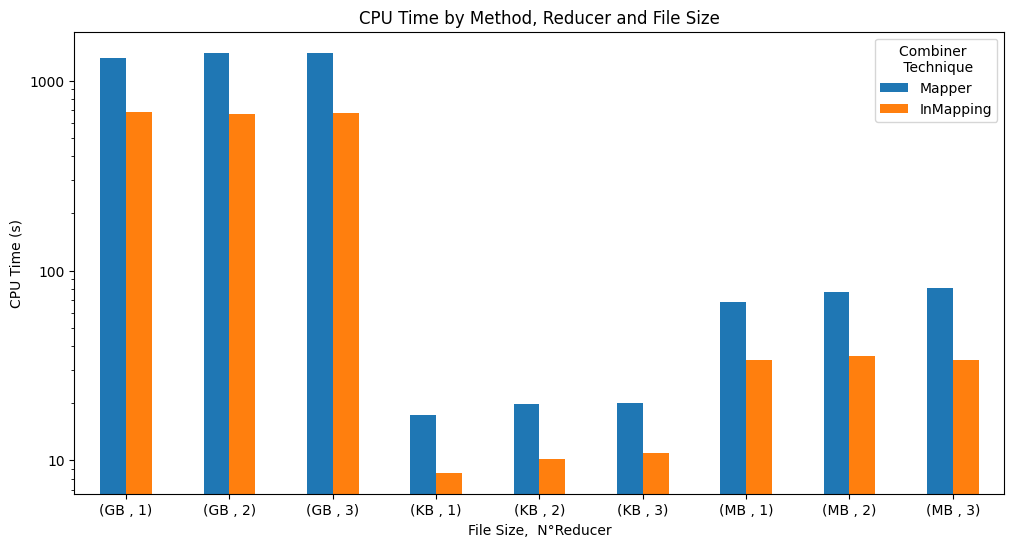

In [10]:
# Dati come stringa multilinea
data = """
CPU_Times_Mapper_1_reducer_GB = 1313,85
CPU_Times_Mapper_2_reducer_GB = 1405,77
CPU_Times_Mapper_3_reducer_GB = 1394,86
CPU_Times_InMapping_1_reducer_GB = 683,98
CPU_Times_InMapping_2_reducer_GB = 667,5
CPU_Times_InMapping_3_reducer_GB = 679,38
CPU_Times_Mapper_1_reducer_MB = 68,3
CPU_Times_Mapper_2_reducer_MB = 77,29
CPU_Times_Mapper_3_reducer_MB = 81,24
CPU_Times_InMapping_1_reducer_MB = 33,63
CPU_Times_InMapping_2_reducer_MB = 35,39
CPU_Times_InMapping_3_reducer_MB = 33,85
CPU_Times_Mapper_1_reducer_KB = 17,42
CPU_Times_Mapper_2_reducer_KB = 19,81
CPU_Times_Mapper_3_reducer_KB = 20,11
CPU_Times_InMapping_1_reducer_KB = 8,61
CPU_Times_InMapping_2_reducer_KB = 10,17
CPU_Times_InMapping_3_reducer_KB = 10,95
"""

# Creare un dizionario per memorizzare i dati
data_dict = {'Method': [], 'Reducer': [], 'File_Size': [], 'CPU_Time': []}

# Iterare sulle righe dei dati
for line in data.split('\n'):
    if line:
        # Estrarre i valori
        method, reducer, file_size, cpu_time = line.split('_')[2], line.split('_')[3].split('=')[0], line.split('_')[5].split('=')[0], line.split('=')[1].strip().replace(',', '.')
        # Aggiungere i valori al dizionario
        data_dict['Method'].append(method)
        data_dict['Reducer'].append(reducer)
        data_dict['File_Size'].append(file_size)
        data_dict['CPU_Time'].append(float(cpu_time))

df = pd.DataFrame(data_dict)

# Trasformare il DataFrame per avere le dimensioni del file come colonne
df_pivot = df.pivot_table(index=['File_Size', 'Reducer'], columns='Method', values='CPU_Time')

# Riordinare le colonne
df_pivot = df_pivot[['Mapper','InMapping']]

# Plottare il DataFrame
df_pivot.plot(kind='bar', figsize=(12, 6))
plt.ylabel('CPU Time (s)')
plt.xlabel('File Size,  N° Reducer')
plt.xticks(rotation=0)
plt.legend(title='Combiner \n Technique')
plt.title('CPU Time by Method, Reducer and File Size')
plt.gca().set_yscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
plt.show()